In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('_mpl-gallery')

In [2]:
catalogues_L2 = pd.read_csv("sc_task_L2.csv")
catalogues_L2.head()

,number,priority,opened_by,state,u_pending_reason,short_description,assignment_group,assigned_to,closed_by,cmdb_ci,opened_at
0,SCTASK0231532,4 - Low,NaN,Pending,Awaiting Customer Response,General Request - Only use this request form i...,L2_B2C,Shivendra Sharma,NaN,Sprinklr,2025-05-20 16:07:54
1,SCTASK0231534,4 - Low,NaN,Pending,Awaiting Customer Response,General Request - Only use this request form i...,L2_B2C,Shivendra Sharma,NaN,Sprinklr,2025-05-20 16:12:53
2,SCTASK0222756,3 - Moderate,NaN,Pending,Awaiting Customer Response,Grant or Modify Access,L2_B2C,Shivendra Sharma,NaN,Sprinklr,2025-03-12 07:18:17
3,SCTASK0230951,4 - Low,NaN,Closed Complete,NaN,General Request - Only use this request form i...,L2_B2C,Shivendra Sharma,Saloni Walke,Sprinklr,2025-05-15 09:58:40
4,SCTASK0230607,4 - Low,NaN,Closed Complete,NaN,General Request - Only use this request form i...,L2_B2C,Saloni Walke,Saloni Walke,Sprinklr,2025-05-13 11:52:00


In [3]:
drop = ["number", "opened_by", "assignment_group", "assigned_to", "closed_by"]
catalogues_L2.drop(drop, axis=1, inplace=True)

catalogues_L2.head()

,priority,state,u_pending_reason,short_description,cmdb_ci,opened_at
0,4 - Low,Pending,Awaiting Customer Response,General Request - Only use this request form i...,Sprinklr,2025-05-20 16:07:54
1,4 - Low,Pending,Awaiting Customer Response,General Request - Only use this request form i...,Sprinklr,2025-05-20 16:12:53
2,3 - Moderate,Pending,Awaiting Customer Response,Grant or Modify Access,Sprinklr,2025-03-12 07:18:17
3,4 - Low,Closed Complete,NaN,General Request - Only use this request form i...,Sprinklr,2025-05-15 09:58:40
4,4 - Low,Closed Complete,NaN,General Request - Only use this request form i...,Sprinklr,2025-05-13 11:52:00


In [4]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(catalogues_L2):
    # Drop rows with missing data in column: 'short_description'
    catalogues_L2 = catalogues_L2.dropna(subset=['short_description'])
    catalogues_L2.drop("u_pending_reason", inplace=True, axis=1)
    return catalogues_L2

catalogues_L2_clean = clean_data(catalogues_L2.copy())
catalogues_L2_clean.head()

,priority,state,short_description,cmdb_ci,opened_at
0,4 - Low,Pending,General Request - Only use this request form i...,Sprinklr,2025-05-20 16:07:54
1,4 - Low,Pending,General Request - Only use this request form i...,Sprinklr,2025-05-20 16:12:53
2,3 - Moderate,Pending,Grant or Modify Access,Sprinklr,2025-03-12 07:18:17
3,4 - Low,Closed Complete,General Request - Only use this request form i...,Sprinklr,2025-05-15 09:58:40
4,4 - Low,Closed Complete,General Request - Only use this request form i...,Sprinklr,2025-05-13 11:52:00


In [107]:
dates = pd.to_datetime(catalogues_L2_clean["opened_at"])
dates

0      2025-05-20 16:07:54
1      2025-05-20 16:12:53
2      2025-03-12 07:18:17
3      2025-05-15 09:58:40
4      2025-05-13 11:52:00
               ...        
2751   2020-08-11 19:12:32
2752   2020-08-20 14:58:00
2753   2020-08-31 10:43:22
2754   2020-08-14 13:58:23
2755   2020-08-11 17:00:35
Name: opened_at, Length: 2755, dtype: datetime64[ns]

In [5]:
def to_date(df, col):
    dates = pd.to_datetime(df[col])
    df[col] = dates.dt.date
    df[col] = pd.to_datetime(df[col])
    return df

catalogues_L2_clean = to_date(catalogues_L2_clean.copy(), "opened_at")
catalogues_L2_clean.head()
#catalogues_L2_clean["opened_at"] = dates.dt.date
#catalogues_L2_clean.head()

,priority,state,short_description,cmdb_ci,opened_at
0,4 - Low,Pending,General Request - Only use this request form i...,Sprinklr,2025-05-20
1,4 - Low,Pending,General Request - Only use this request form i...,Sprinklr,2025-05-20
2,3 - Moderate,Pending,Grant or Modify Access,Sprinklr,2025-03-12
3,4 - Low,Closed Complete,General Request - Only use this request form i...,Sprinklr,2025-05-15
4,4 - Low,Closed Complete,General Request - Only use this request form i...,Sprinklr,2025-05-13


In [6]:
catalogues_L2_clean["opened_at"].dtype

dtype('<M8[ns]')

In [9]:
catalogues_L2_clean.groupby(catalogues_L2_clean["opened_at"].dt.year)["priority"].value_counts()

opened_at  priority    
2020       4 - Low         190
           1 - Critical     22
           3 - Moderate     10
           2 - High          1
2021       4 - Low         672
           3 - Moderate     75
           2 - High         55
           1 - Critical      2
2022       4 - Low         317
           2 - High        259
           1 - Critical     83
           3 - Moderate     49
2023       2 - High        232
           4 - Low         216
           3 - Moderate     54
           1 - Critical     15
2024       2 - High        214
           4 - Low         123
           3 - Moderate     29
           1 - Critical      6
2025       2 - High         75
           4 - Low          49
           3 - Moderate      7
Name: count, dtype: int64

In [11]:
catalogues_L2_clean.set_index("opened_at", inplace=True)

In [12]:
group_year_month = pd.DataFrame(catalogues_L2_clean.groupby([catalogues_L2_clean.index.year, catalogues_L2_clean.index.month])["priority"].value_counts())
group_year_month.head()

count
opened_at opened_at priority           
2020      8         4 - Low           3
                    1 - Critical      2
          9         4 - Low           7
                    1 - Critical      2
                    2 - High          1

In [13]:
#Getting unique year values from index
catalogues_L2_clean.groupby(catalogues_L2_clean.index.year)["priority"].value_counts().index.get_level_values("opened_at").unique()

Index([2020, 2021, 2022, 2023, 2024, 2025], dtype='int32', name='opened_at')

In [14]:
years = list(catalogues_L2_clean.groupby(catalogues_L2_clean.index.year)["priority"].value_counts().index.get_level_values("opened_at").unique())
p_levels = list(catalogues_L2_clean.groupby(catalogues_L2_clean.index.year)["priority"].value_counts().index.get_level_values("priority").unique())

In [15]:
print(years)
print('')
print(p_levels)

[2020, 2021, 2022, 2023, 2024, 2025]

['4 - Low', '1 - Critical', '3 - Moderate', '2 - High']


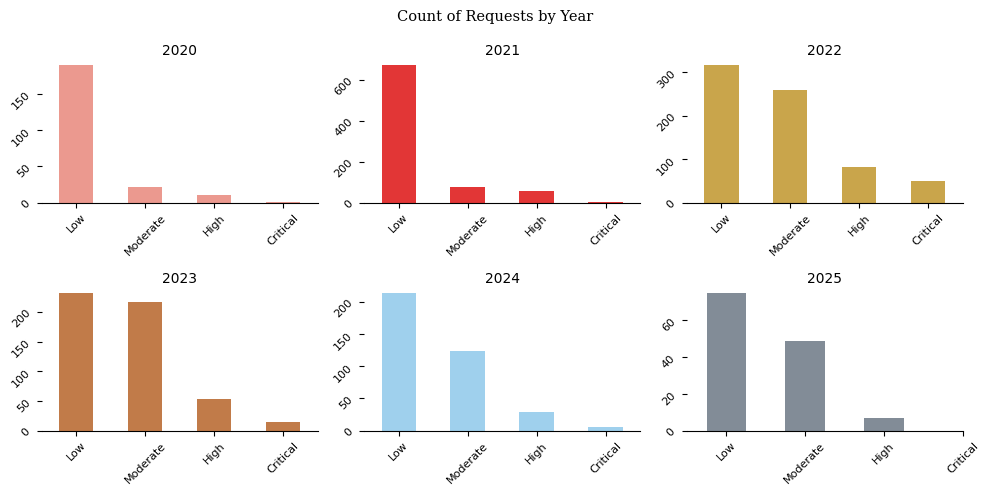

In [275]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
sns.set_palette("bright")
colours = ['salmon', 'red', 'goldenrod',
           'chocolate', 'lightskyblue', 'slategray']

index = 0
for row in range(2):
    for col in range(3):
        ax[row,col].set_title(years[index], size=10, loc='center', pad=0.5)
        data = catalogues_L2_clean[catalogues_L2_clean.index.year==years[index]]["priority"].value_counts()
        
        g = sns.barplot(data, ax=ax[row,col], alpha=0.9, width=0.5, color=colours[index])
        sns.despine(left=True)
        
        ax[row,col].set_xlabel("")
        ax[row,col].set_xticks([0, 1, 2, 3])
        ax[row,col].set_xticklabels(["Low", "Moderate", "High", "Critical"])
        ax[row,col].tick_params(axis='x', labelsize=8, rotation=45)
        ax[row,col].tick_params(axis='y', labelsize=8, rotation=45)
        ax[row,col].set_ylabel("")
        index += 1

plt.suptitle("Count of Requests by Year", fontsize=10.5, family='serif')
plt.tight_layout()
plt.show()

In [251]:
print("Number of requests raised for each year")
print("")
print(catalogues_L2_clean.groupby(catalogues_L2_clean.index.year)["priority"].count())

Number of requests raised for each year

opened_at
2020    223
2021    804
2022    708
2023    517
2024    372
2025    131
Name: priority, dtype: int64


In [ ]:
fig, ax = plt.subplots(nrows=3, ncol=2, squeeze=True)

index = 0

for row in range(3):
    for col in range(2):
        wedges, text, pct = ax[row,col].pie(male_edu,
                                              wedgeprops=dict(width=0.5),
                                              startangle=0,
                                              autopct="%.1f%%",
                                              pctdistance=0.8,
                                              colors=sb.set_palette("tab10", len(male_edu)),
                                              textprops=dict(color='w',
                                                             fontfamily='sans-serif',
                                                             fontsize=12,
                                                             fontweight='bold'))

In [25]:
group_year_month.reset_index(level=1, inplace=True)
group_year_month.head()

,priority,opened_at,count
opened_at,,,
2020,4 - Low,8,3
2020,1 - Critical,8,2
2020,4 - Low,9,7
2020,1 - Critical,9,2
2020,2 - High,9,1


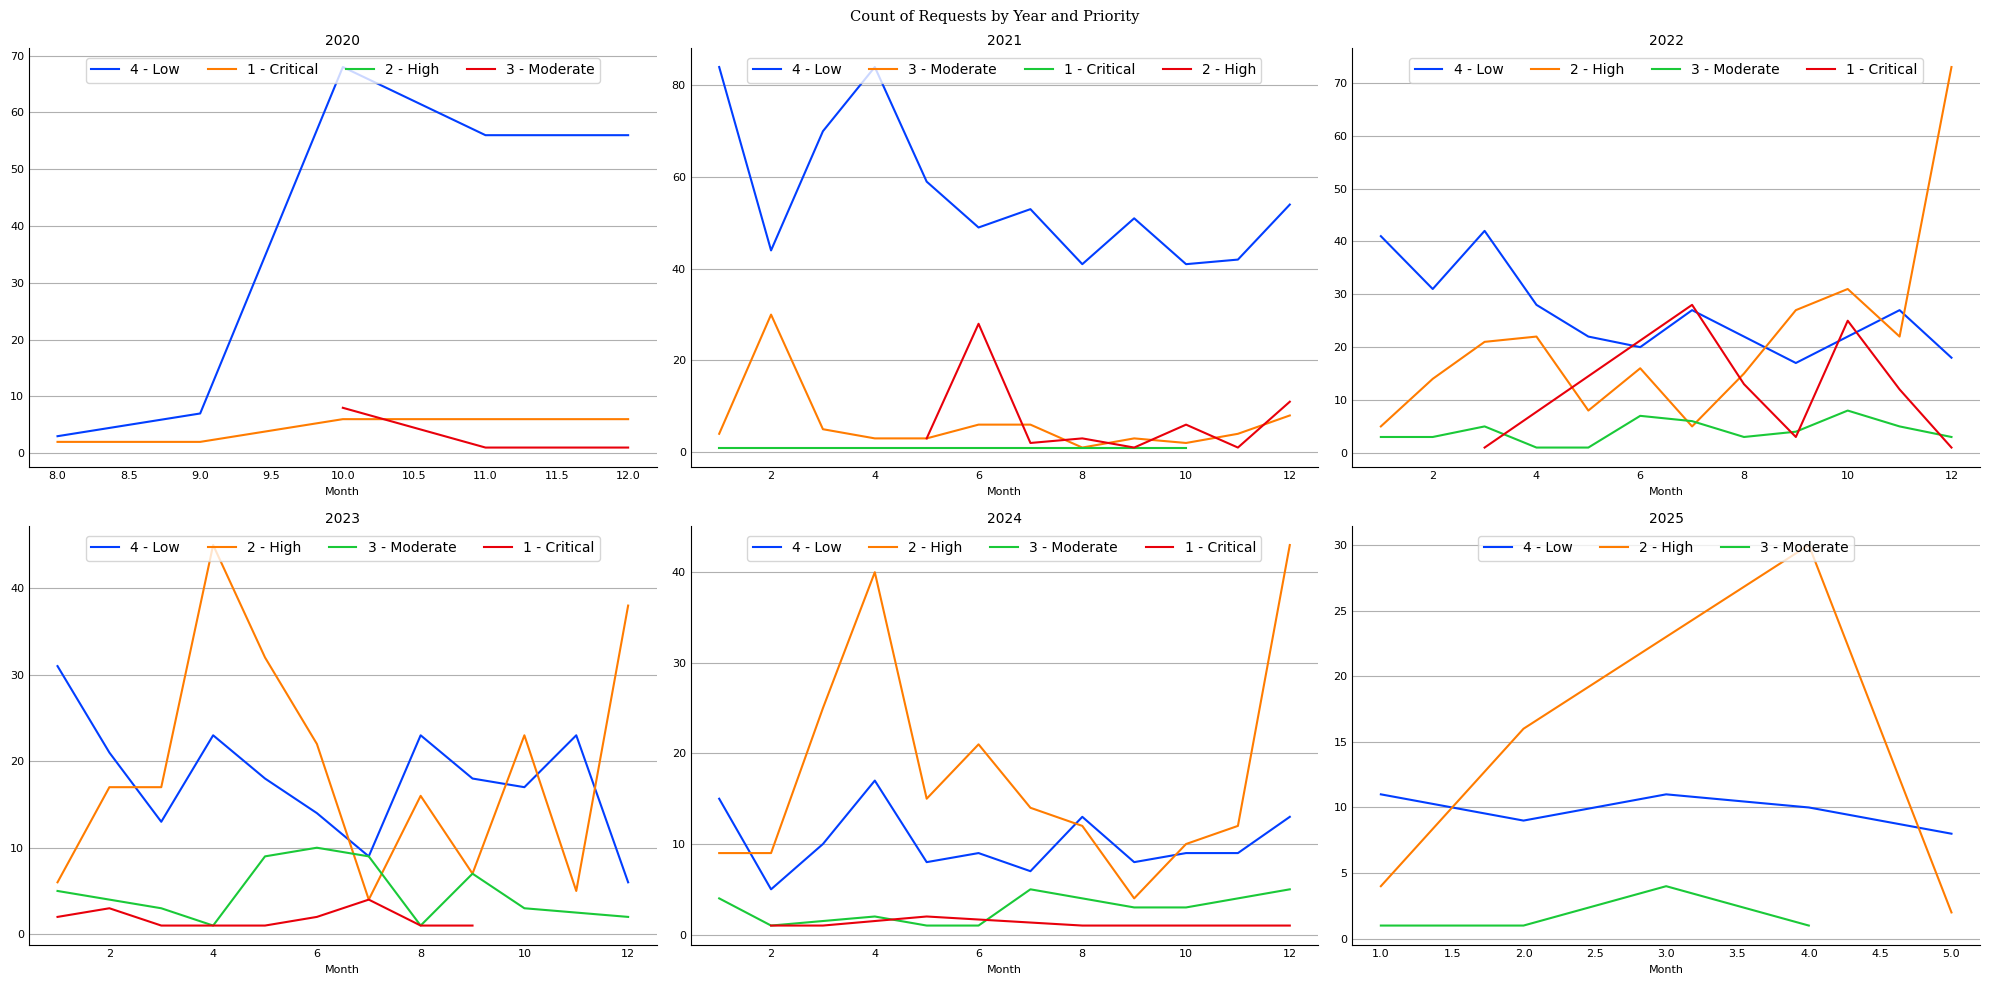

In [504]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), squeeze=True)
sns.set_palette("bright")

index = 0
for row in range(2):
    for col in range(3):
        ax[row,col].set_title(years[index], size=10, loc='center', pad=0.5)
        data = group_year_month[group_year_month.index==years[index]]
        
        l = sns.lineplot(data=data, y='count', x='opened_at',
                         ax=ax[row,col], hue='priority', legend='brief')
        sns.despine()
        sns.move_legend(ax[row,col], loc='lower center', ncol=4, bbox_to_anchor=(.5, .9), title=None, frameon=None)
        
        ax[row,col].grid(axis='x')
        ax[row,col].set_xlabel("Month", size=8)
        #ax[row,col].set_xticks([0, 1, 2, 3])
        #ax[row,col].set_xticklabels(["Low", "Moderate", "High", "Critical"])
        ax[row,col].tick_params(axis='x', labelsize=8)
        ax[row,col].tick_params(axis='y', labelsize=8)
        ax[row,col].set_ylabel("")
        index += 1

plt.suptitle("Count of Requests by Year and Priority", fontsize=10.5, family='serif')
plt.tight_layout()
plt.show()

In [434]:
group_year_month.tail()

,priority,opened_at,count
opened_at,,,
2025,2 - High,4,30
2025,4 - Low,4,10
2025,3 - Moderate,4,1
2025,4 - Low,5,8
2025,2 - High,5,2


In [495]:
low_ticks = group_year_month[group_year_month["priority"]=="4 - Low"]["count"].values
mod_ticks = group_year_month[group_year_month["priority"]=="3 - Moderate"]["count"].values
high_ticks = group_year_month[group_year_month["priority"]=="2 - High"]["count"].values
crit_ticks = group_year_month[group_year_month["priority"]=="1 - Critical"]["count"].values

In [496]:
low_ticks

array([ 3,  7, 68, 56, 56, 84, 44, 70, 84, 59, 49, 53, 41, 51, 41, 42, 54,
       41, 31, 42, 28, 22, 20, 27, 22, 17, 22, 27, 18, 31, 21, 13, 23, 18,
       14,  9, 23, 18, 17, 23,  6, 15,  5, 10, 17,  8,  9,  7, 13,  8,  9,
        9, 13, 11,  9, 11, 10,  8])

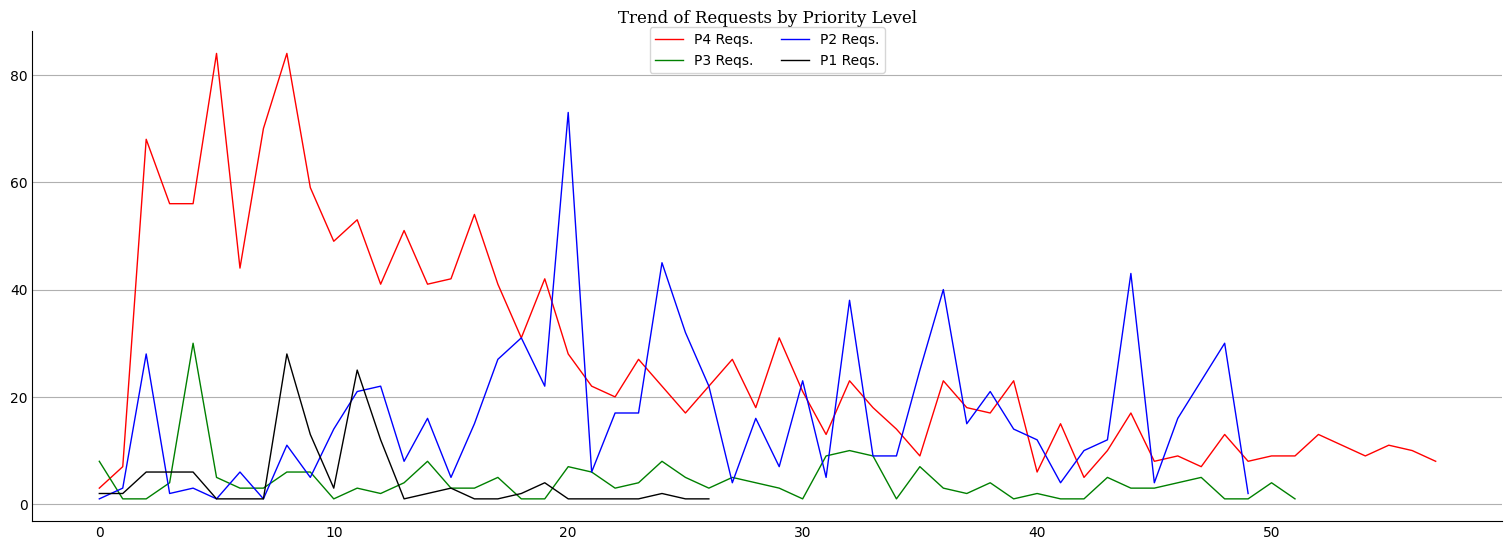

In [531]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.style.use('_mpl-gallery')

x_ticks = np.array(np.arange(8, 58, step=10, dtype='int8'))

ax.plot(low_ticks, label="P4 Reqs.", color='red', linewidth=1)
ax.plot(mod_ticks, label="P3 Reqs.", color="green", linewidth=1)
ax.plot(high_ticks, label="P2 Reqs.", color="blue", linewidth=1)
ax.plot(crit_ticks, label="P1 Reqs.", color="black", linewidth=1)
#ax.set_xticks(x_ticks)

sns.despine()
plt.title("Trend of Requests by Priority Level", family="serif")
plt.grid(axis='x', visible=False)
plt.legend()
sns.move_legend(ax, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0.9))
plt.show()

In [26]:
group_year_month[group_year_month.index==2021].groupby("priority")["count"].sum()

priority
1 - Critical      2
2 - High         55
3 - Moderate     75
4 - Low         672
Name: count, dtype: int64

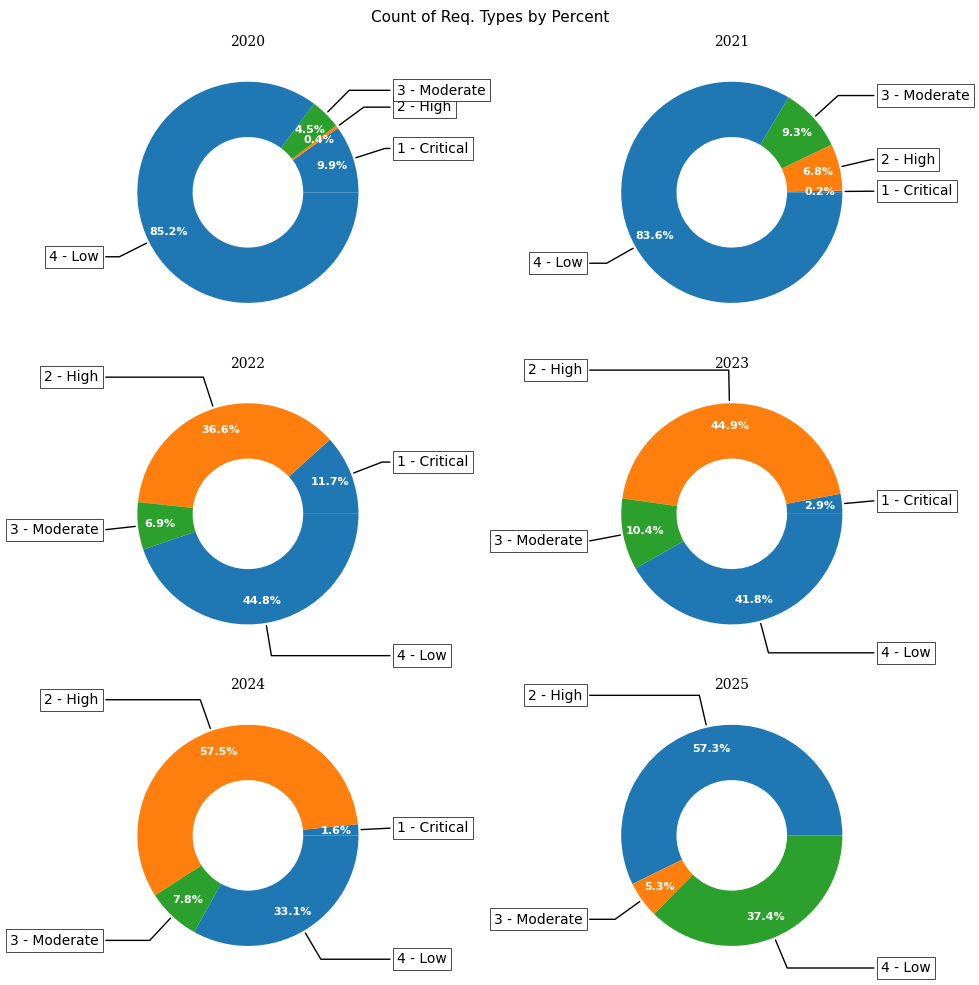

In [51]:
fig, ax = plt.subplots(3, 2, squeeze=True, subplot_kw=dict(aspect='equal'), figsize=(10, 10))

index=0
for row in range(3):
    for col in range(2):
        ax[row,col].set_title(years[index], size=10, family='serif')
        wedges, text, pct = ax[row,col].pie(group_year_month[group_year_month.index==years[index]].groupby("priority")["count"].sum(),
                                             autopct="%.1f%%",
                                            wedgeprops=dict(width=0.5),
                                            startangle=0,
                                            pctdistance=0.8,
                                            colors=sns.set_palette('tab10', len(group_year_month[group_year_month.index==years[index]].groupby("priority")["count"].sum())),
                                            textprops=dict(color='w', fontfamily='sans-serif', fontsize=8, fontweight='bold'))
        
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.5)
        kw = dict(arrowprops=dict(arrowstyle="-"),
                  bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            hor_align = {-1: "right", 1: "left"}[int(np.sign(x))]
            conn_style = "angle, angleA=0, angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": conn_style})
            ax[row,col].annotate(group_year_month[group_year_month.index==years[index]].groupby("priority")["count"].sum().index[i],
                                    xy=(x, y),
                                    xytext=(1.35 * np.sign(x), 1.3 * y),
                                    horizontalalignment=hor_align,
                                    fontfamily='sans-serif',
                                    fontsize=10, **kw)
        index += 1

plt.suptitle("Count of Req. Types by Percent", size=11)
plt.tight_layout()
plt.show()

In [24]:
group_year_month[group_year_month.index==2020]

,,opened_at,count
opened_at,priority,,


In [560]:
group_year_month[group_year_month.index==2020].groupby("priority")["count"].sum()

priority
1 - Critical     22
2 - High          1
3 - Moderate     10
4 - Low         190
Name: count, dtype: int64

In [566]:
text

[Text(0.5999816782596229, 0.004688896753647494, '0.2%'),
 Text(0.5841259187924073, 0.13710182710279983, '6.8%'),
 Text(0.4436839570409687, 0.40391155747820323, '9.3%'),
 Text(-0.5219438217594653, -0.29593013859207296, '83.6%')]